In [1]:
%cd /scratch/mt/ashapiro/Hate_Speech/

/scratch/mt/ashapiro/Hate_Speech


In [2]:
from contrastive_utils import *

In [3]:
train, test = getData(sub_task="C", return_type="pandas", pre_proccessed=True)

In [6]:
model = SentenceTransformer("UBC-NLP/MARBERTv2")

Some weights of the model checkpoint at /home/ashapiro/.cache/torch/sentence_transformers/UBC-NLP_MARBERTv2 were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Testing The distribution

### Baseline Marbertv2

Batches: 100%|██████████| 179/179 [00:02<00:00, 59.92it/s]


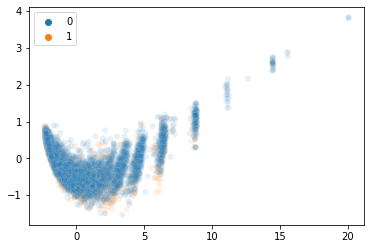

In [16]:
plot_representation(model, train)

### Classification Trained Marbert

Batches:   0%|          | 0/100 [00:00<?, ?it/s]

Batches:   0%|          | 0/179 [00:00<?, ?it/s]

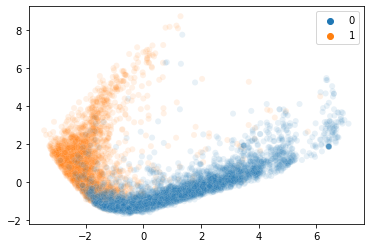

In [7]:
plot_representation(model, train)

Batches:   0%|          | 0/13 [00:00<?, ?it/s]

Batches:   0%|          | 0/28 [00:00<?, ?it/s]

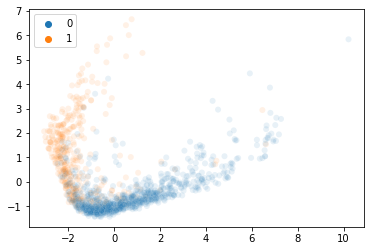

In [8]:
plot_representation(model, test)

# Batch All Triplet Loss

In [10]:
list(train.labels.value_counts().index)

[0, 6, 1, 3, 5, 2]

In [5]:
%cd /scratch/mt/ashapiro/Hate_Speech/
%load_ext autoreload
%autoreload 2

/scratch/mt/ashapiro/Hate_Speech


In [6]:
%reload_ext autoreload

In [11]:
from contrastive_utils import *
from sentence_transformers import losses
train_loss = losses.BatchAllTripletLoss
train, test, model  = run_batch_loss_expirement(
                          loss = train_loss, 
                          batch_size = 128,
                          epochs = 10,
                          expirement_name = "BatchAllTripletLossTaskC"
)

  0%|          | 0/8887 [00:00<?, ?it/s]

  0%|          | 0/1270 [00:00<?, ?it/s]

Some weights of the model checkpoint at /scratch/mt/ashapiro/Hate_Speech/Models/Marbertv2 were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/ashapiro/.local/lib/python3.8/site-packages/transformers/optimization.py:306: FutureW

### Classifier Trial, Freezed, F1 = 

In [7]:
model_checkpoint = "/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/BatchAllTripletLossTaskC"
output_dir = "/scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC"
trainer = run_linearclassifier(model_checkpoint, output_dir, batch_size=64, epochs=100, es_patience = 10, my_classifier_dropout=0.3, num_labels=7, subtask="C")

Pre-Processed


100%|██████████| 2/2 [00:00<00:00, 290.95it/s]
Didn't find file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/BatchAllTripletLossTaskC/added_tokens.json. We won't load it.
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/BatchAllTripletLossTaskC/vocab.txt
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/BatchAllTripletLossTaskC/tokenizer.json
loading file None
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/BatchAllTripletLossTaskC/special_tokens_map.json
loading file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/BatchAllTripletLossTaskC/tokenizer_config.json
loading configuration file /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/BatchAllTripletLossTaskC/config.json
Model config BertConfig {
  "_name_or_path": "/scratch/mt/ashapiro/Hate_Speech/Models/Marbertv2",
  "architectures": [
    "BertModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": 0.3,
  "directiona

In [8]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/home/ashapiro/.local/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 8887
  Num Epochs = 100
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 13900
  1%|          | 139/13900 [00:15<25:49,  8.88it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forw

{'eval_loss': 0.4908359944820404, 'eval_f1': 0.13645178351060702, 'eval_recall': 0.14285714285714285, 'eval_precision': 0.13059617547806524, 'eval_runtime': 4.1489, 'eval_samples_per_second': 306.103, 'eval_steps_per_second': 76.646, 'epoch': 1.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-139/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-139/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-139/special_tokens_map.json
  2%|▏         | 277/13900 [00:38<27:28,  8.26it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 315/318 [00:04<00:00, 76.65it/s]/cm/shared/ebtree/software/Python/3.8.6-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/

{'eval_loss': 0.49315011501312256, 'eval_f1': 0.13645178351060702, 'eval_recall': 0.14285714285714285, 'eval_precision': 0.13059617547806524, 'eval_runtime': 4.3973, 'eval_samples_per_second': 288.817, 'eval_steps_per_second': 72.318, 'epoch': 2.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-278/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-278/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-278/special_tokens_map.json
  3%|▎         | 416/13900 [01:02<26:03,  8.62it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 315/318 [00:04<00:00, 72.25it/s]/cm/shared/ebtree/software/Python/3.8.6-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/

{'eval_loss': 0.4866334795951843, 'eval_f1': 0.13645178351060702, 'eval_recall': 0.14285714285714285, 'eval_precision': 0.13059617547806524, 'eval_runtime': 4.4931, 'eval_samples_per_second': 282.654, 'eval_steps_per_second': 70.775, 'epoch': 3.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-417/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-417/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-417/special_tokens_map.json
  4%|▎         | 501/13900 [01:20<29:39,  7.53it/s]  

{'loss': 0.5946, 'learning_rate': 0.0009640287769784173, 'epoch': 3.6}


  4%|▍         | 556/13900 [01:26<26:44,  8.32it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▉| 315/318 [00:04<00:00, 74.15it/s]/cm/shared/ebtree/software/Python/3.8.6-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

                                                   
  4%|▍         | 556/13900 [01:31<26:44,  8.32it/s]A
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints/S

{'eval_loss': 0.5372727513313293, 'eval_f1': 0.13645178351060702, 'eval_recall': 0.14285714285714285, 'eval_precision': 0.13059617547806524, 'eval_runtime': 4.4699, 'eval_samples_per_second': 284.122, 'eval_steps_per_second': 71.142, 'epoch': 4.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-556/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-556/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-556/special_tokens_map.json
  5%|▍         | 694/13900 [01:50<24:07,  9.12it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▊| 314/318 [00:04<00:00, 72.23it/s]/cm/shared/ebtree/software/Python/3.8.6-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/

{'eval_loss': 0.5977465510368347, 'eval_f1': 0.13645178351060702, 'eval_recall': 0.14285714285714285, 'eval_precision': 0.13059617547806524, 'eval_runtime': 4.5378, 'eval_samples_per_second': 279.873, 'eval_steps_per_second': 70.078, 'epoch': 5.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-695/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-695/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-695/special_tokens_map.json
  6%|▌         | 833/13900 [02:14<25:34,  8.51it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

100%|██████████| 318/318 [00:04<00:00, 75.67it/s]/cm/shared/ebtree/software/Python/3.8.6-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/

{'eval_loss': 0.5818267464637756, 'eval_f1': 0.13645178351060702, 'eval_recall': 0.14285714285714285, 'eval_precision': 0.13059617547806524, 'eval_runtime': 4.4636, 'eval_samples_per_second': 284.521, 'eval_steps_per_second': 71.242, 'epoch': 6.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-834/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-834/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-834/special_tokens_map.json
  7%|▋         | 972/13900 [02:38<24:38,  8.74it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 311/318 [00:04<00:00, 76.05it/s]/cm/shared/ebtree/software/Python/3.8.6-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/

{'eval_loss': 0.5873541831970215, 'eval_f1': 0.13645178351060702, 'eval_recall': 0.14285714285714285, 'eval_precision': 0.13059617547806524, 'eval_runtime': 4.3784, 'eval_samples_per_second': 290.059, 'eval_steps_per_second': 72.629, 'epoch': 7.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-973/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-973/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-973/special_tokens_map.json
  7%|▋         | 1001/13900 [02:49<18:20, 11.72it/s] 

{'loss': 0.6238, 'learning_rate': 0.0009280575539568345, 'epoch': 7.19}


  8%|▊         | 1112/13900 [03:02<22:23,  9.52it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 312/318 [00:04<00:00, 77.08it/s]/cm/shared/ebtree/software/Python/3.8.6-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

                                                    
  8%|▊         | 1112/13900 [03:06<22:23,  9.52it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints

{'eval_loss': 0.5208374857902527, 'eval_f1': 0.13645178351060702, 'eval_recall': 0.14285714285714285, 'eval_precision': 0.13059617547806524, 'eval_runtime': 4.1926, 'eval_samples_per_second': 302.911, 'eval_steps_per_second': 75.847, 'epoch': 8.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-1112/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-1112/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-1112/special_tokens_map.json
  9%|▉         | 1250/13900 [03:26<30:33,  6.90it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 99%|█████████▊| 314/318 [00:03<00:00, 80.66it/s]/cm/shared/ebtree/software/Python/3.8.6-GCCcore-10.2.0/lib/python3.8/site-packages/skle

{'eval_loss': 0.5576577186584473, 'eval_f1': 0.13645178351060702, 'eval_recall': 0.14285714285714285, 'eval_precision': 0.13059617547806524, 'eval_runtime': 3.71, 'eval_samples_per_second': 342.315, 'eval_steps_per_second': 85.714, 'epoch': 9.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-1251/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-1251/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-1251/special_tokens_map.json
 10%|▉         | 1389/13900 [03:48<22:46,  9.16it/s]  The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 97%|█████████▋| 310/318 [00:04<00:00, 81.22it/s]/cm/shared/ebtree/software/Python/3.8.6-GCCcore-10.2.0/lib/python3.8/site-packages/skle

{'eval_loss': 0.513495147228241, 'eval_f1': 0.13645178351060702, 'eval_recall': 0.14285714285714285, 'eval_precision': 0.13059617547806524, 'eval_runtime': 4.4049, 'eval_samples_per_second': 288.318, 'eval_steps_per_second': 72.193, 'epoch': 10.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-1390/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-1390/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-1390/special_tokens_map.json
 11%|█         | 1501/13900 [04:09<28:49,  7.17it/s]  

{'loss': 0.6257, 'learning_rate': 0.0008920863309352518, 'epoch': 10.79}


 11%|█         | 1528/13900 [04:12<23:12,  8.89it/s]The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1270
  Batch size = 4

 98%|█████████▊| 312/318 [00:04<00:00, 79.00it/s]/cm/shared/ebtree/software/Python/3.8.6-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

                                                    
 11%|█         | 1529/13900 [04:16<23:12,  8.89it/s]
                                                 Saving model checkpoint to /scratch/mt/ashapiro/Hate_Speech/Checkpoints

{'eval_loss': 0.5235781073570251, 'eval_f1': 0.13645178351060702, 'eval_recall': 0.14285714285714285, 'eval_precision': 0.13059617547806524, 'eval_runtime': 4.2573, 'eval_samples_per_second': 298.308, 'eval_steps_per_second': 74.694, 'epoch': 11.0}


Model weights saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-1529/pytorch_model.bin
tokenizer config file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-1529/tokenizer_config.json
Special tokens file saved in /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-1529/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from /scratch/mt/ashapiro/Hate_Speech/Checkpoints/SentenceBert/Classifiers/BatchAllTripletLossTaskC/checkpoint-139 (score: 0.13645178351060702).
 11%|█         | 1529/13900 [04:20<35:07,  5.87it/s]

{'train_runtime': 260.5072, 'train_samples_per_second': 3411.422, 'train_steps_per_second': 53.357, 'train_loss': 0.60956421297621, 'epoch': 11.0}


TrainOutput(global_step=1529, training_loss=0.60956421297621, metrics={'train_runtime': 260.5072, 'train_samples_per_second': 3411.422, 'train_steps_per_second': 53.357, 'train_loss': 0.60956421297621, 'epoch': 11.0})

## BatchHardTripletLoss -BAD-

In [ ]:
%cd /scratch/mt/ashapiro/Hate_Speech/
%load_ext autoreload
%autoreload 2
from contrastive_utils import *
from sentence_transformers import losses
train_loss = losses.BatchHardSoftMarginTripletLoss
train, test, model  = run_batch_loss_expirement(
                          loss = train_loss, 
                          batch_size = 128,
                          epochs = 10,
                          expirement_name = "BatchHardTripletLoss"
)

/scratch/mt/ashapiro/Hate_Speech
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/8887 [00:00<?, ?it/s]

  0%|          | 0/1270 [00:00<?, ?it/s]

Some weights of the model checkpoint at /scratch/mt/ashapiro/Hate_Speech/Models/Marbertv2 were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/ashapiro/.local/lib/python3.8/site-packages/transformers/optimization.py:306: FutureW

## BatchHardSoftMarginTripletLoss --BAD--

In [2]:
%cd /scratch/mt/ashapiro/Hate_Speech/
%load_ext autoreload
%autoreload 2
from contrastive_utils import *
from sentence_transformers import losses
train_loss = losses.BatchHardSoftMarginTripletLoss
train, test, model  = run_batch_loss_expirement(
                          loss = train_loss, 
                          batch_size = 128,
                          epochs = 10,
                          expirement_name = "BatchHardSoftMarginTripletLoss"
)

/scratch/mt/ashapiro/Hate_Speech


  0%|          | 0/8887 [00:00<?, ?it/s]

  0%|          | 0/1270 [00:00<?, ?it/s]

Some weights of the model checkpoint at /scratch/mt/ashapiro/Hate_Speech/Models/Marbertv2 were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/ashapiro/.local/lib/python3.8/site-packages/transformers/optimization.py:306: FutureW

KeyboardInterrupt: 

## BatchSemiHardTripletLoss

In [10]:
import os 
os.getpid()
torch.cuda.empty_cache()

In [12]:
%cd /scratch/mt/ashapiro/Hate_Speech/
%load_ext autoreload
%autoreload 2
from contrastive_utils import *
from sentence_transformers import losses
train_loss = losses.BatchHardSoftMarginTripletLoss
train, test, model  = run_batch_loss_expirement(
                          loss = train_loss, 
                          batch_size = 128,
                          epochs = 10,
                          expirement_name = "BatchSemiHardTripletLoss"
)

/scratch/mt/ashapiro/Hate_Speech
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/8887 [00:00<?, ?it/s]

  0%|          | 0/1270 [00:00<?, ?it/s]

Some weights of the model checkpoint at /scratch/mt/ashapiro/Hate_Speech/Models/Marbertv2 were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/ashapiro/.local/lib/python3.8/site-packages/transformers/optimization.py:306: FutureW

In [ ]:
plot_representation(model, train)

Batches: 100%|██████████| 28/28 [00:00<00:00, 55.50it/s]


[0.08882292 0.10469703]


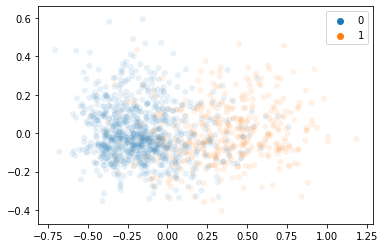

In [16]:
plot_representation(model, test)

## Classifcation Trial